# Basic analsis and plotting of model train-test performance

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import torch 
import torchvision.models as models
import matplotlib.pyplot as plt

sys.path.append('../')
from ml.loss import DiceLoss
from ml.data import *
from ml.model import *
from lib.perf_utils import *

In [2]:
project_dir = '../'
data_dir = '{}datasets/'.format(project_dir)
results_dir = '{}results/Exp_kaggle/'.format(project_dir)

Exp_kaggle_mateuszbuda_1, cuda test accuracy: 60.459
Exp_kaggle_mateuszbuda_2, cuda test accuracy: 47.464
Exp_kaggle_mateuszbuda_3, cuda test accuracy: 50.567
Exp_kaggle_mateuszbuda_4, cuda test accuracy: 52.446
Exp_kaggle_mateuszbuda_5, cuda test accuracy: 31.060
Exp_kaggle_mateuszbuda_6, cuda test accuracy: 43.637
Exp_kaggle_mateuszbuda_7, cuda test accuracy: 41.235
Exp_kaggle_mateuszbuda_8, cuda test accuracy: 40.548
Exp_kaggle_mateuszbuda_9, cuda test accuracy: 31.508
Exp_kaggle_mateuszbuda_10, cuda test accuracy: 64.919
Exp_kaggle_mateuszbuda_11, cuda test accuracy: 46.934
Exp_kaggle_mateuszbuda_12, cuda test accuracy: 57.921
Exp_kaggle_mateuszbuda_13, cuda test accuracy: 51.945
Exp_kaggle_mateuszbuda_14, cuda test accuracy: 35.186
Exp_kaggle_mateuszbuda_15, cuda test accuracy: 63.286
Exp_kaggle_mateuszbuda_16, cuda test accuracy: 57.745
Exp_kaggle_mateuszbuda_17, cuda test accuracy: 42.804


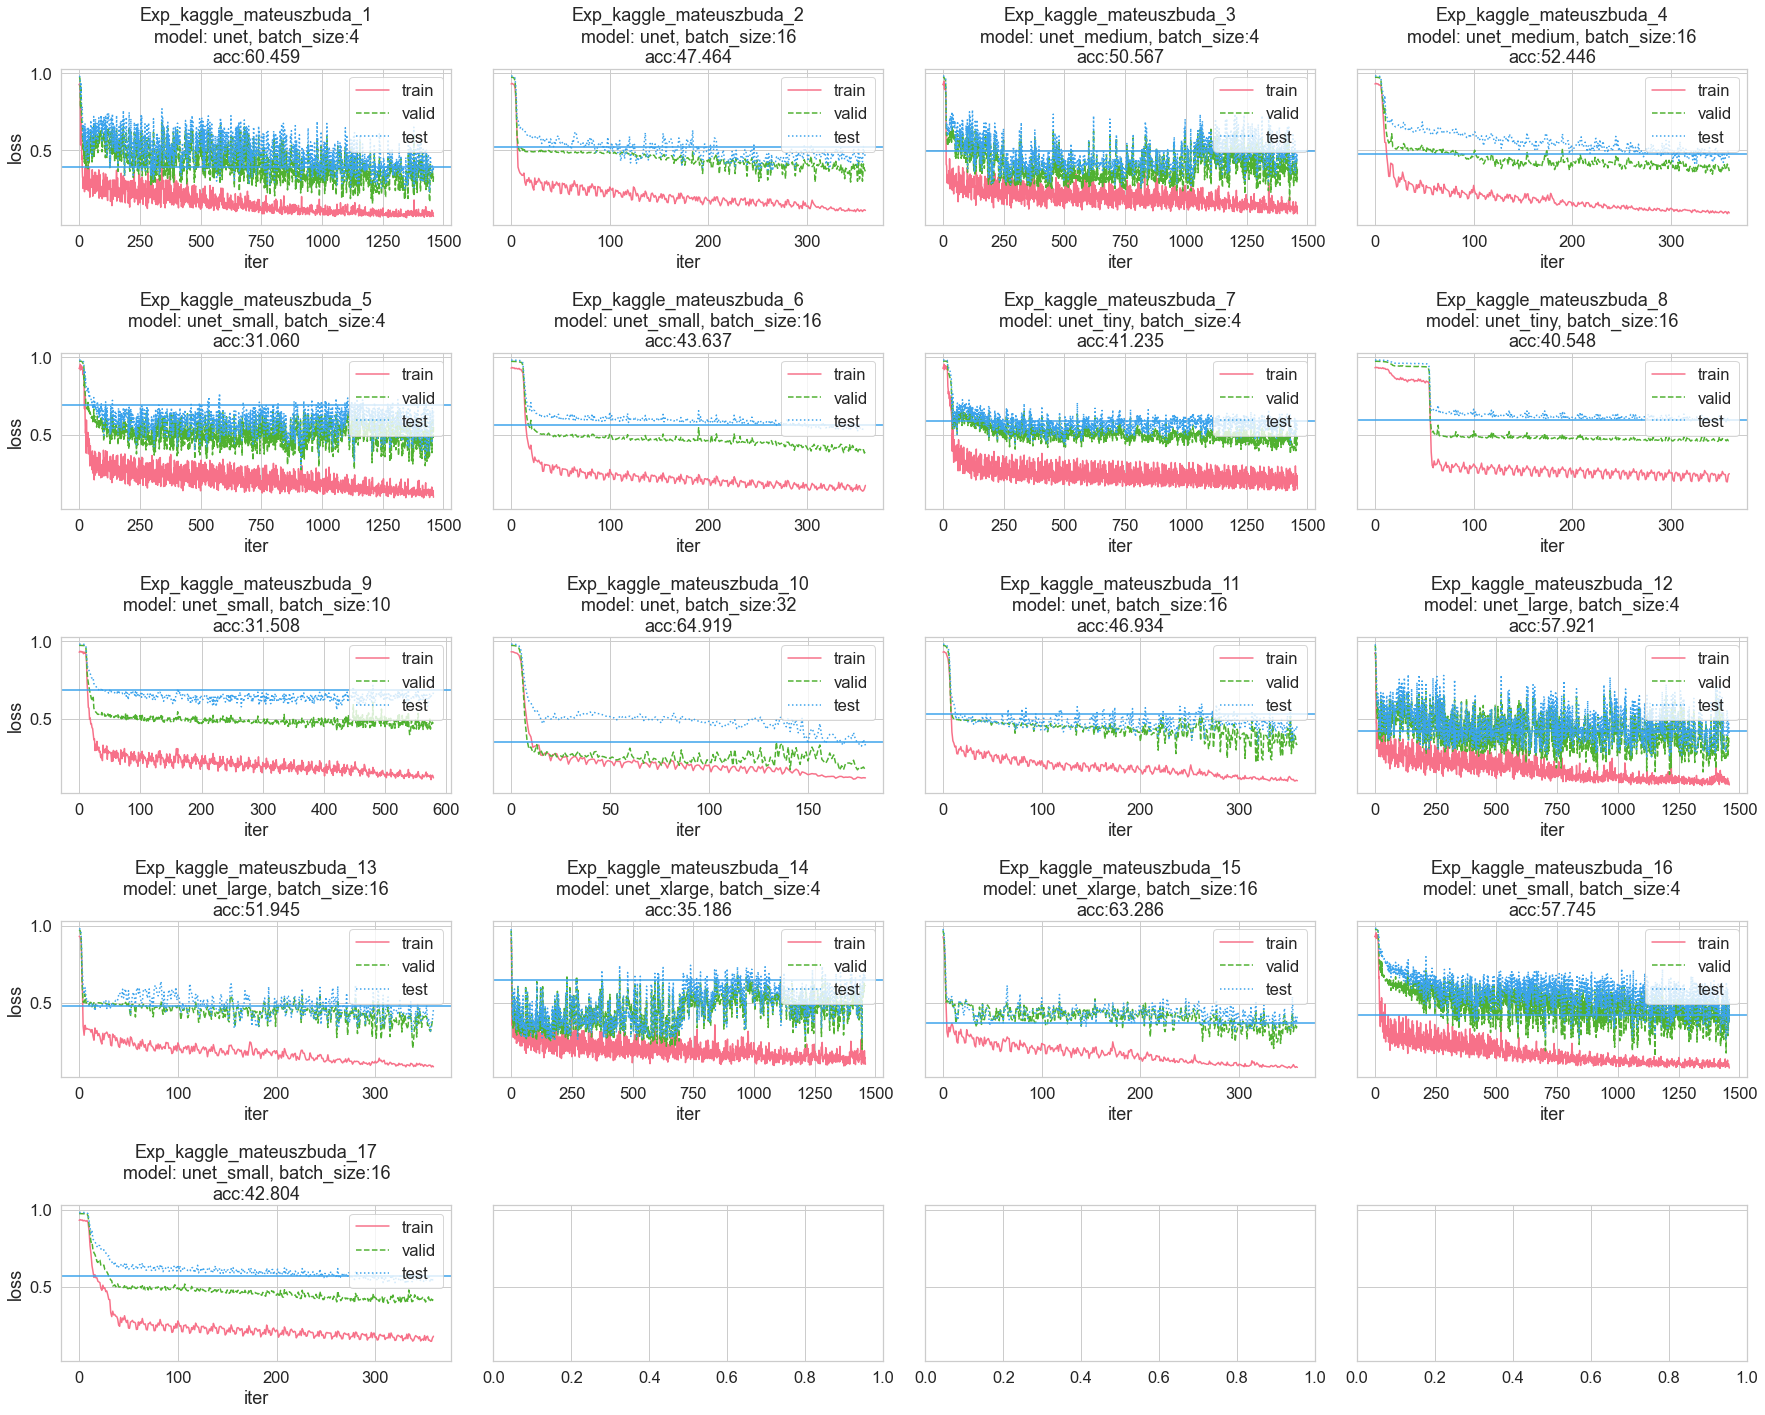

In [3]:
exp_idx = range(1,18)
exp_names = ['Exp_kaggle_mateuszbuda_{}'.format(i) for i in exp_idx] #['Exp_kaggle_mateuszbuda','Exp_kaggle_mateuszbuda_pruned']
devices = ['cuda']

pal = sns.color_palette("husl", 3)

sns.set(font_scale = 1.5)
with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(5,4, figsize=(25,20),sharex=False,sharey=True)
    for e, exp_name in enumerate(exp_names):
        if len(exp_names) > 1:
            ax = axes.ravel()[e]
        else:
            ax = axes
        for d, device in enumerate(devices):
            iter_csv = '{}{}/{}/iter.csv'.format(results_dir, exp_name, device)
            iter_df = pd.read_csv(iter_csv)
            iter_df = iter_df.rename(columns={'Unnamed: 0':'iter'})

            model_save_ops = np.sum(iter_df['valid_loss'].diff() < 0)

            exp_csv = '{}{}/{}/experiment_config.csv'.format(results_dir, exp_name, device)
            exp_df = pd.read_csv(exp_csv)
            test_perf = exp_df['test_perf'].values[0]
            print('{}, {} test accuracy: {:4.3f}'.format(exp_name, device, test_perf))

            test_loss = 1 - test_perf/100

            # plot 
            g = sns.lineplot(y='train_loss', x='iter', data=iter_df, ax=ax, label='train', color=pal[0])
            g = sns.lineplot(y='valid_loss', x='iter', linestyle='--', data=iter_df, ax=ax, label='valid', color=pal[1])
            g = sns.lineplot(y='test_loss', x='iter', linestyle=':', data=iter_df, ax=ax, label='test', color=pal[2])

            ax.axhline(test_loss, color=pal[2], linestyle='-')
            sub_title = '{}\nmodel: {}, batch_size:{}\nacc:{:4.3f}'.format(exp_name,exp_df['model'].values[0],exp_df['batch_size'].values[0],test_perf)
            ax.set_title(sub_title)
            ax.set_ylabel('loss')
            ax.legend(loc=1)
    
    plt.tight_layout()

## Inference on saved models

In [4]:
dataset_name = 'kaggle_3m'
root_data_dir = data_dir

exp_idx = range(16,18)
experiment_list = ['Exp_kaggle_mateuszbuda_{}'.format(i) for i in exp_idx] 

loss_type = 'dice'
model_perf_dict = get_model_perfs(dataset_name, root_data_dir, results_dir, experiment_list, loss_type)

reading validation images...
preprocessing validation volumes...
cropping validation volumes...
padding validation volumes...
resizing validation volumes...
normalizing validation volumes...
done creating validation dataset
reading test images...
preprocessing test volumes...
cropping test volumes...
padding test volumes...
resizing test volumes...
normalizing test volumes...
done creating test dataset

Experiment: Exp_kaggle_mateuszbuda_16, model path: ../results/Exp_kaggle/Exp_kaggle_mateuszbuda_16/cuda/unet_small.pth
subset: valid
Using cache found in /home/nikhil/.cache/torch/hub/mateuszbuda_brain-segmentation-pytorch_master
subset: test

Experiment: Exp_kaggle_mateuszbuda_17, model path: ../results/Exp_kaggle/Exp_kaggle_mateuszbuda_17/cuda/unet_small.pth
subset: valid
Using cache found in /home/nikhil/.cache/torch/hub/mateuszbuda_brain-segmentation-pytorch_master
subset: test
